In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import glob

In [29]:
path = "outputs/"
algo_names = ["1nn", "cart", "mlp", "nb", "random_forest"]
def load_results_from_term(term):
    results_data = {}
    for algo_name in algo_names:
        path_full = glob.glob(path + "full_" + term + "_" + algo_name + "*")[0]
        path_reduced = glob.glob(path + "reduced_" + term + "_" + algo_name + "*")[0]
        path_resampled = glob.glob(path + "resampled_" + term + "_" + algo_name + "*")[0]
        path_improved = glob.glob(path + "improved_" + term + "_" + algo_name + "*")[0]
        print(f"Full {algo_name}:  {path_full}")
        print(f"Reduced {algo_name}:  {path_reduced}")
        print(f"Resampled {algo_name}:  {path_resampled}")
        print(f"Improved {algo_name}:  {path_improved}")
        results_data[algo_name] = {
            "full": json.load(open(path_full)),
            "reduced": json.load(open(path_reduced)),
            "resampled": json.load(open(path_resampled)),
            "improved": json.load(open(path_improved)) 
        }
    
    return results_data



arit = load_results_from_term("arit")
print("-----------------------")
esc = load_results_from_term("esc")
print("---------------------------")
leit = load_results_from_term("leit")

Full 1nn:  outputs\full_arit_1nn_results.json
Reduced 1nn:  outputs\reduced_arit_1nn_results.json
Resampled 1nn:  outputs\resampled_arit_1nn_results.json
Improved 1nn:  outputs\improved_arit_1nn_results.json
Full cart:  outputs\full_arit_cart_results.json
Reduced cart:  outputs\reduced_arit_cart_results.json
Resampled cart:  outputs\resampled_arit_cart_results.json
Improved cart:  outputs\improved_arit_cart_results.json
Full mlp:  outputs\full_arit_mlp_results.json
Reduced mlp:  outputs\reduced_arit_mlp_results.json
Resampled mlp:  outputs\resampled_arit_mlp_results.json
Improved mlp:  outputs\improved_arit_mlp_results.json
Full nb:  outputs\full_arit_nb_results.json
Reduced nb:  outputs\reduced_arit_nb_results.json
Resampled nb:  outputs\resampled_arit_nb_results.json
Improved nb:  outputs\improved_arit_nb_results.json
Full random_forest:  outputs\full_arit_random_forest_results.json
Reduced random_forest:  outputs\reduced_arit_random_forest_results.json
Resampled random_forest:  outp

In [30]:
import pandas as pd
def get_mean_class_metric(result, score_name, label, metric):
    metrics = []
    counter = 0
    for key in result:
        if key.startswith('i'):
            x = result[key][score_name][label][metric]
            metrics.append(x)
            counter+=1
    
    return sum(metrics) / counter

def get_metric_per_classes(database, metric, test_type, valid_base=False):
    if valid_base:
        score_name = "valid_scores"
    else:
        score_name = "scores"
    
    superior_list = []
    inferior_list = []
    avg_list = []
    for algo_name in algo_names:
        superior = get_mean_class_metric(database[algo_name][test_type], score_name, "Superior", metric)
        inferior = get_mean_class_metric(database[algo_name][test_type], score_name, "Inferior", metric)
        avg = database[algo_name][test_type]["avg_" + score_name ][metric]
        superior_list.append(superior)
        inferior_list.append(inferior)
        avg_list.append(avg)

    
    return superior_list, inferior_list, avg_list


def get_metric_df(database, metric, valid_base=False):
    full = get_metric_per_classes(database, metric, "full", valid_base=valid_base)
    reduced =  get_metric_per_classes(database, metric, "reduced", valid_base=valid_base)
    resampled = get_metric_per_classes(database, metric, "resampled", valid_base=valid_base)
    improved = get_metric_per_classes(database, metric, "improved", valid_base=valid_base)

    row_superior = []
    for i in range(len(algo_names)):
        row_superior += [full[0][i], reduced[0][i], resampled[0][i], improved[0][i]]

        
    row_inferior = []
    for i in range(len(algo_names)):
        row_inferior += [full[1][i], reduced[1][i], resampled[1][i], improved[1][i]]
        
    row_avg = []
    for i in range(len(algo_names)):
        row_avg += [full[2][i], reduced[2][i], resampled[2][i], improved[2][i]]

    rows = np.zeros((3,20))
    rows[0] = row_superior
    rows[1] = row_inferior
    rows[2] = row_avg

    columns = []
    for algo_name in algo_names:
        columns.append(algo_name)
        columns.append(algo_name + "/Ant-IS")
        columns.append(algo_name + "/SMOTE")
        columns.append(algo_name + "/Ant-IS+SMOTE")
        

    return pd.DataFrame(rows, columns=columns, index=["Superior", "Inferior", "Média"])
    

get_metric_df(esc, "precision", valid_base=True)

,1nn,1nn/Ant-IS,1nn/SMOTE,1nn/Ant-IS+SMOTE,cart,cart/Ant-IS,cart/SMOTE,cart/Ant-IS+SMOTE,mlp,mlp/Ant-IS,mlp/SMOTE,mlp/Ant-IS+SMOTE,nb,nb/Ant-IS,nb/SMOTE,nb/Ant-IS+SMOTE,random_forest,random_forest/Ant-IS,random_forest/SMOTE,random_forest/Ant-IS+SMOTE
Superior,0.555940,0.531263,0.430477,0.438202,0.599667,0.532278,0.401557,0.565660,0.891750,0.846736,0.715945,0.652356,0.273299,0.312848,0.369322,0.398404,0.823377,0.861240,0.670885,0.750115
Inferior,0.868686,0.845474,0.862333,0.850211,0.818678,0.847687,0.849911,0.898175,0.907875,0.908547,1.000000,0.958668,0.990000,0.951837,1.000000,0.943927,0.924766,0.907156,0.956941,0.940424
Média,0.712313,0.688369,0.646405,0.644206,0.709173,0.689983,0.625734,0.731918,0.899812,0.877641,0.857973,0.805512,0.631650,0.632342,0.684661,0.671165,0.874071,0.884198,0.813913,0.845270


In [31]:
arit_test_precision_df = get_metric_df(arit, "precision")
arit_valid_precision_df = get_metric_df(arit, "precision", valid_base=True)
arit_test_recall_df = get_metric_df(arit, "recall")
arit_valid_recall_df = get_metric_df(arit, "recall", valid_base=True)
arit_test_fmeasure_df = get_metric_df(arit, "f1-score")
arit_valid_fmeasure_df = get_metric_df(arit, "f1-score", valid_base=True)

esc_test_precision_df = get_metric_df(esc, "precision")
esc_valid_precision_df = get_metric_df(esc, "precision", valid_base=True)
esc_test_recall_df = get_metric_df(esc, "recall")
esc_valid_recall_df = get_metric_df(esc, "recall", valid_base=True)
esc_test_fmeasure_df = get_metric_df(esc, "f1-score")
esc_valid_fmeasure_df = get_metric_df(esc, "f1-score", valid_base=True)

leit_test_precision_df = get_metric_df(leit, "precision")
leit_valid_precision_df = get_metric_df(leit, "precision", valid_base=True)
leit_test_recall_df = get_metric_df(leit, "recall")
leit_valid_recall_df = get_metric_df(leit, "recall", valid_base=True)
leit_test_fmeasure_df = get_metric_df(leit, "f1-score")
leit_valid_fmeasure_df = get_metric_df(leit, "f1-score", valid_base=True)

In [32]:
# Definindo a largura das barras
barWidth = 0.40

# Espaçamento entre barras
espacamentoEntreBarras = 0.05

# espaçamento de um grupo no outro
espacamentoEntreGrupos = 6.5

def autolabel(ax, rects):
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ypos = rect.get_y() + height/2
        ax.text(width + 6.0, ypos - .23, width, ha='center', va='bottom', rotation=0, fontsize=10) 


def autolabels(ax, labels):
    for label in labels:
        autolabel(ax, label)


def get_bars_positions(num_groups, num_columns):
    pos = []
    for i in range(num_groups):
        if i == 0:
            pos.append([(x * espacamentoEntreGrupos + espacamentoEntreBarras)
                        * -1 for x in range(num_columns)])
            continue

        pos.append([x - barWidth - espacamentoEntreBarras for x in pos[-1]])

    return tuple(pos)


def get_bars_per_df(df):
    
    bars = {
        "full": [], 
        "Ant-IS": [], 
        "SMOTE": [], 
        "Ant-IS+SMOTE": []
    }
    
    for label in bars.keys():
        for algo_name in algo_names:
            if label == "full":
                suffix = ""
            else:
                suffix = "/" + label

            bars[label] += [ 
                round(df[algo_name + suffix].loc["Superior"]*100, 2), 
                round(df[algo_name + suffix].loc["Inferior"]*100, 2)
            ] 
    
    return bars


In [33]:
def plot_metrics_data(
        arit_precision_df,
        arit_recall_df,
        arit_fmeasure_df,
        esc_precision_df,
        esc_recall_df,
        esc_fmeasure_df,
        leit_precision_df,
        leit_recall_df,
        leit_fmeasure_df,
        title):    
    
    colors = [
    "#336EB0", 
    "#AA3333", 
    "#94B444", 
    "#71528A", 
    "#8AC6EF", 
    "#F58A07", 
    "#fc03f4", 
    "#1a6666", 
    "#3d0c10", 
    "#e6f200", 
    "#050505", 
    "#9c5982"]
    
    bar_labels = [
        "Aritimética",  
        "Aritimética Ant-IS",  
        "Aritimética SMOTE",  
        "Aritimética SMOTE + Ant-IS",  
        "Escrita",  
        "Escrita Ant-IS",  
        "Escrita SMOTE",  
        "Escrita SMOTE + Ant-IS",  
        "Leitura",  
        "Leitura Ant-IS",  
        "Leitura SMOTE",  
        "Leitura SMOTE + Ant-IS"
    ]

    # tec_labels = ["", "Ant-IS", "SMOTE", "ANT-IS + SMOTE"]
    algo_labels = ['1NN', 'CART', 'MLP', 'NB', 'RF']
    metrics = ["Precesion", "Recall", "FMeasure"]
    number_columns = len(algo_labels)*2
    number_groups = len(bar_labels)

    bars_arit_precision = get_bars_per_df(arit_precision_df)
    print("aaa" +  str(len(bars_arit_precision["full"])))
    bars_arit_recall = get_bars_per_df(arit_recall_df)
    bars_arit_fmeasure = get_bars_per_df(arit_fmeasure_df)

    bars_esc_precision = get_bars_per_df(esc_precision_df)
    bars_esc_recall = get_bars_per_df(esc_recall_df)
    bars_esc_fmeasure = get_bars_per_df(esc_fmeasure_df)

    
    bars_leit_precision = get_bars_per_df(leit_precision_df)
    bars_leit_recall = get_bars_per_df(leit_recall_df)
    bars_leit_fmeasure = get_bars_per_df(leit_fmeasure_df)

    bars_data = [
        [
            bars_arit_precision["full"],
            bars_arit_precision["Ant-IS"],
            bars_arit_precision["SMOTE"],
            bars_arit_precision["Ant-IS+SMOTE"],
            bars_esc_precision["full"],
            bars_esc_precision["Ant-IS"],
            bars_esc_precision["SMOTE"],
            bars_esc_precision["Ant-IS+SMOTE"],
            bars_leit_precision["full"],
            bars_leit_precision["Ant-IS"],
            bars_leit_precision["SMOTE"],
            bars_leit_precision["Ant-IS+SMOTE"],
        ],
        [
            bars_arit_recall["full"],
            bars_arit_recall["Ant-IS"],
            bars_arit_recall["SMOTE"],
            bars_arit_recall["Ant-IS+SMOTE"],
            bars_esc_recall["full"],
            bars_esc_recall["Ant-IS"],
            bars_esc_recall["SMOTE"],
            bars_esc_recall["Ant-IS+SMOTE"],
            bars_leit_recall["full"],
            bars_leit_recall["Ant-IS"],
            bars_leit_recall["SMOTE"],
            bars_leit_recall["Ant-IS+SMOTE"],
        ],
        [
            bars_arit_fmeasure["full"],
            bars_arit_fmeasure["Ant-IS"],
            bars_arit_fmeasure["SMOTE"],
            bars_arit_fmeasure["Ant-IS+SMOTE"],
            bars_esc_fmeasure["full"],
            bars_esc_fmeasure["Ant-IS"],
            bars_esc_fmeasure["SMOTE"],
            bars_esc_fmeasure["Ant-IS+SMOTE"],
            bars_leit_fmeasure["full"],
            bars_leit_fmeasure["Ant-IS"],
            bars_leit_fmeasure["SMOTE"],
            bars_leit_fmeasure["Ant-IS+SMOTE"],
        ]
    ]

    # Aumentando o gráfico
    plt.rcParams['figure.figsize'] = (30, 30)
    plt.rcParams['figure.titlesize'] = 'small'
    fig, axes = plt.subplots(nrows=1, ncols=3)
    
    for i in range(len(axes)):
        groups = get_bars_positions(number_groups, number_columns)
        bars = []
        for j  in range(number_groups):
            bar = axes[i].barh(groups[j], bars_data[i][j], barWidth,
                        color=colors[j], label=bar_labels[j])

            bars.append(bar)

        axes[i].set_xticks(np.arange(0, 140, 20))
        
        yticks = [r - barWidth - espacamentoEntreBarras - 0.3 for r in groups[0]]
        axes[i].set_yticks(yticks)
        axes[i].set_yticklabels(np.full((int(number_columns / 2), 2), ['High', 'Low']).flatten())
        axes[i].set_title(metrics[i], fontsize=14)
        autolabels(axes[i], bars)

        for j in range(len(yticks), 2):
            y = yticks[j] + ((yticks[j] + yticks[j + 1]) / 2) + 0.4
            axes[i].text(-5, y, algo_labels[j], rotation='vertical', fontsize=16)
    
    for i in range(len(algo_names)):
        y = yticks[i] + ((yticks[i] + yticks[i + 1]) / 2)
        axes[0].text(-6, y, algo_labels[i], rotation='vertical', fontsize=16)

    axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
    fig.suptitle(title, fontsize=18, y=0.91)
    # axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)


aaa10


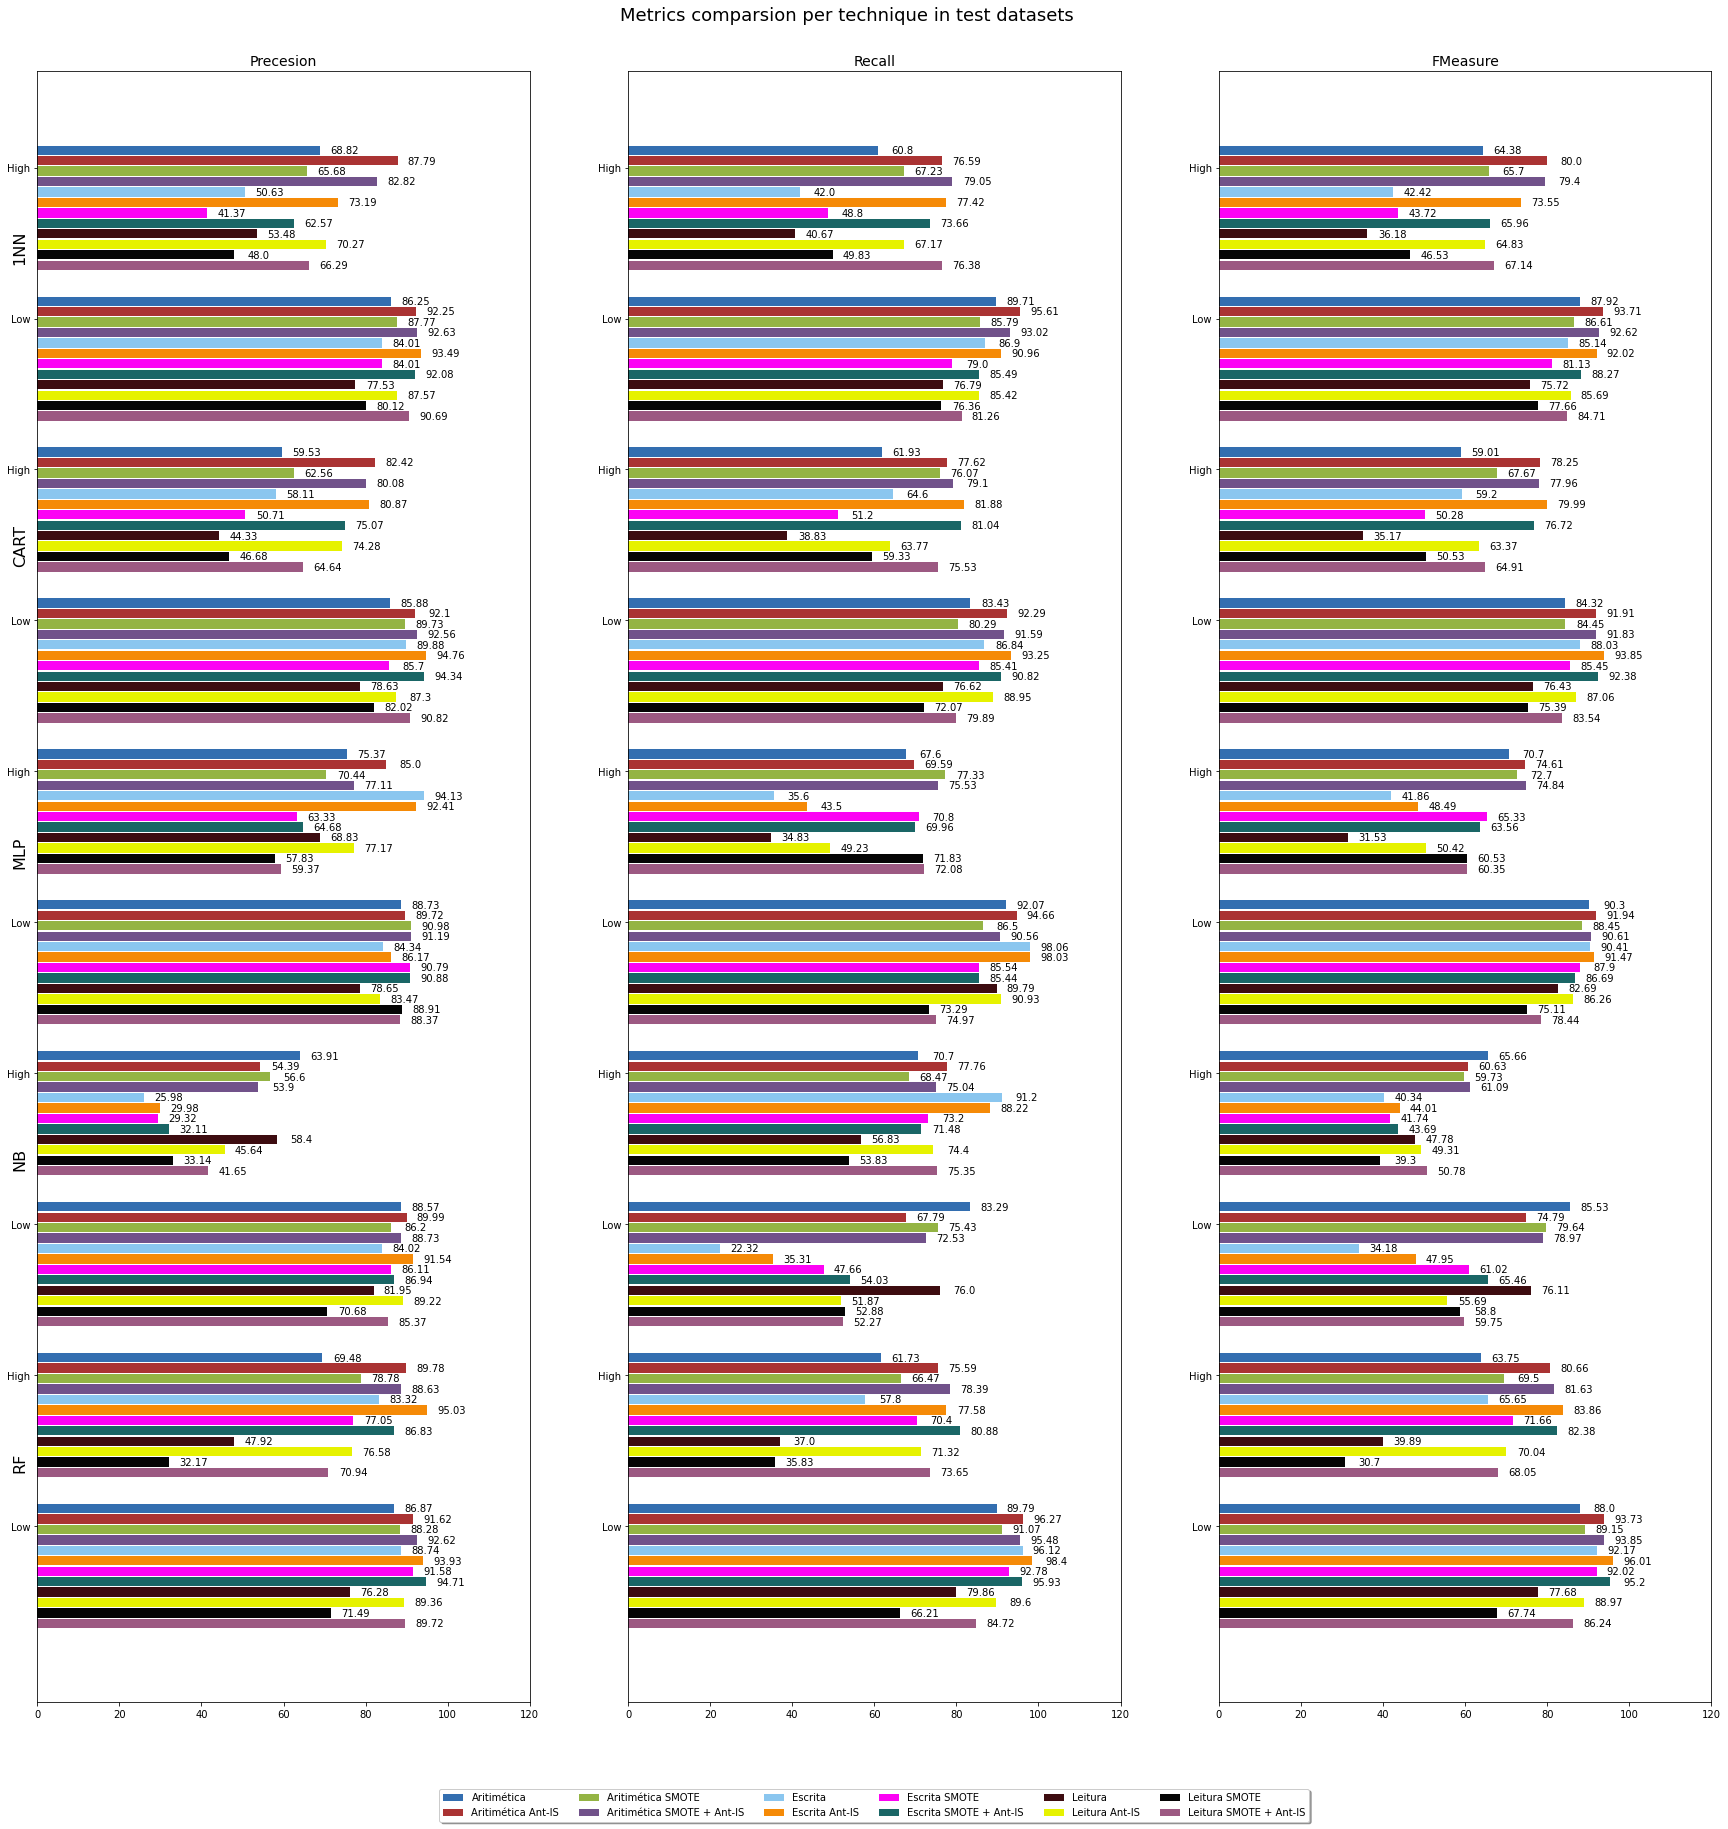

In [34]:
plot_metrics_data(
    arit_test_precision_df,
    arit_test_recall_df,
    arit_test_fmeasure_df,
    esc_test_precision_df,
    esc_test_recall_df,
    esc_test_fmeasure_df,
    leit_test_precision_df,
    leit_test_recall_df,
    leit_test_fmeasure_df,
    "Metrics comparsion per technique in test datasets")

aaa10


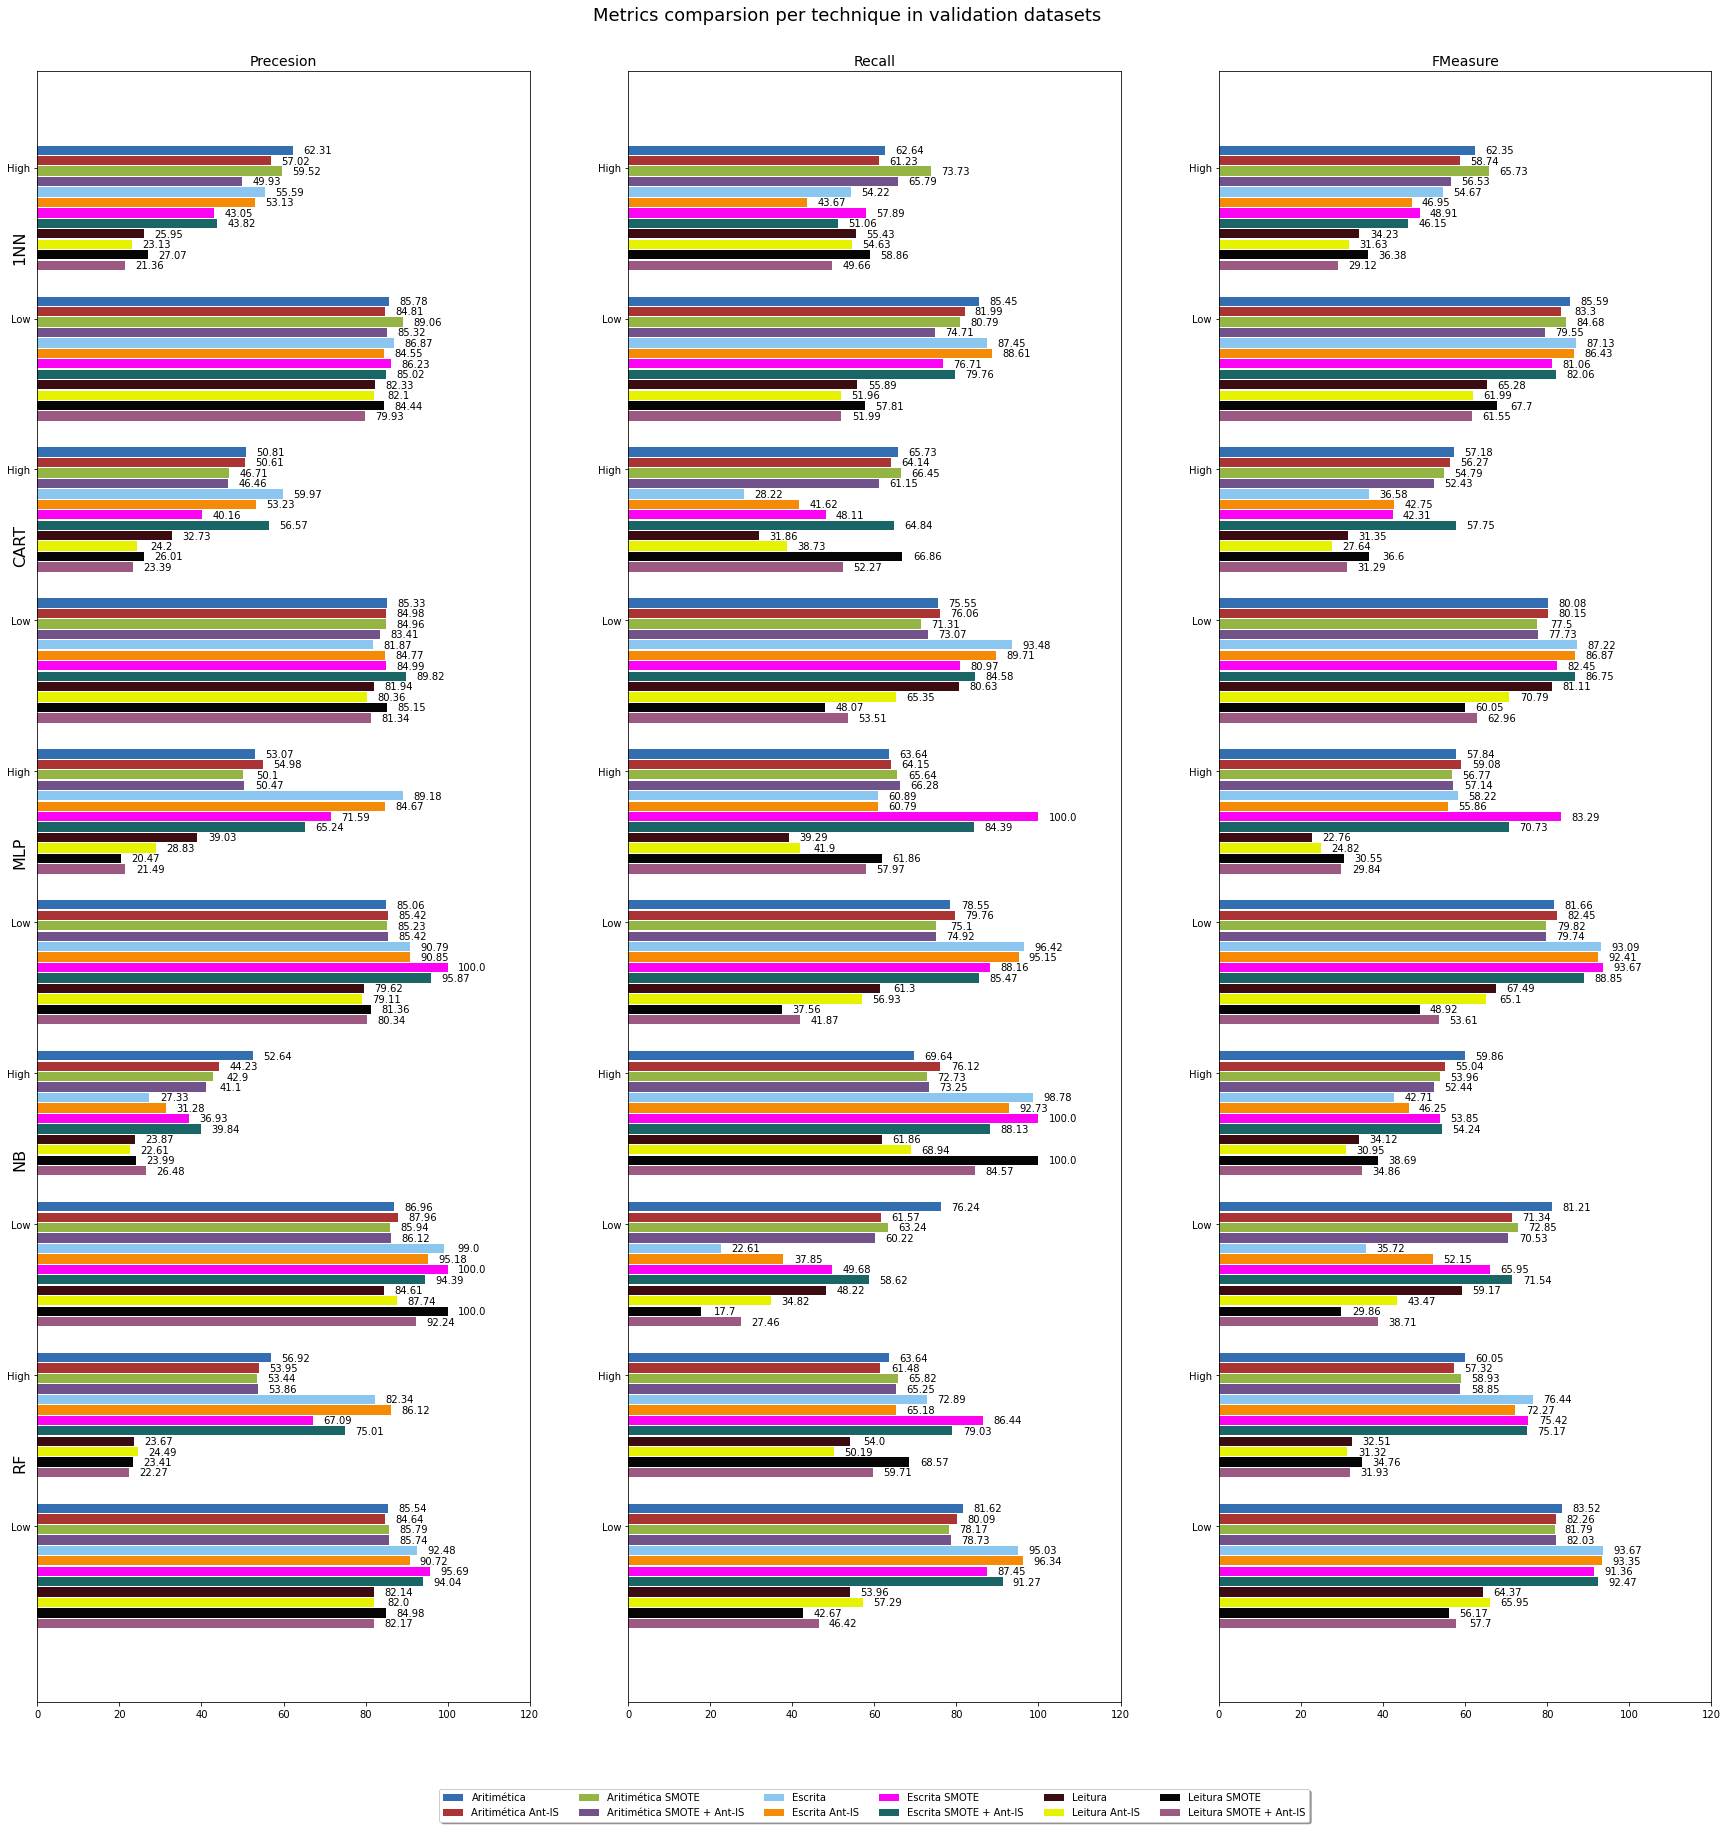

In [36]:
plot_metrics_data(
    arit_valid_precision_df,
    arit_valid_recall_df,
    arit_valid_fmeasure_df,
    esc_valid_precision_df,
    esc_valid_recall_df,
    esc_valid_fmeasure_df,
    leit_valid_precision_df,
    leit_valid_recall_df,
    leit_valid_fmeasure_df,
    "Metrics comparsion per technique in validation datasets")